# Machine Learning Assignment
## Depression classification model

Import all the modules and libraries

In [14]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
import pandas as pd
import pickle as pk
import seaborn as sns
import tensorflow as tf
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import plot_confusion_matrix

The code below is to train data using GPU instead of CPU

In [15]:
physical_devices=tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Read data in the csv file

In [16]:
data = pd.read_csv("dataset.csv")

Pre-process some data to remove unused data, convert data type and 

In [17]:
data.dropna(inplace=True)
y = data['Label']
data.drop('Label', axis=1, inplace=True)

Reformat the type of all the data to float32

In [18]:
data.shape

(320, 20)

In [19]:
column_names = data.columns

for name in column_names:
    data[name] =data[name].astype('float32')

In [20]:
data.head(5)

,1 Kesedihan,2 Pesimis,3 Kegagalan Lalu,4 Hilang Kepuasan,5 Rasa Bersalah,6 Rasa Dihukum,7 Tidak suka diri sendiri,8 Kritik diri sendiri,9 Fikir untuk bunuh diri,10 Menangis,11 Sakit hati,12 Hilang minat,13 Sukar buat keputusan,14 Tak berguna,15 Hilang tenaga,16 Perubahan tidur,17 Terganggu,18 Perubahan selera,19 Masalah berat badan,20 Risau keadaan fizikal
0,2.0,3.0,3.0,1.0,2.0,1.0,3.0,2.0,3.0,3.0,3.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,0.0,0.0
1,1.0,2.0,1.0,1.0,2.0,0.0,3.0,3.0,1.0,3.0,3.0,2.0,0.0,3.0,1.0,1.0,0.0,2.0,0.0,0.0
2,2.0,1.0,2.0,3.0,2.0,3.0,1.0,1.0,0.0,1.0,1.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0
3,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,2.0,2.0,2.0,2.0
4,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,2.0,0.0


Split the data into training set and testing set

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42, shuffle=True)

Start to train the data

In [22]:
model = svm.SVC(decision_function_shape='ovo')
model.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

Predict accuracy and print out

In [23]:
accuracy = model.predict(X_test)
metrics.accuracy_score(accuracy, y_test)


0.9433962264150944

Export the model into the sav file

In [24]:
filename = "depression_model.sav"
pk.dump(model, open(filename, 'wb'))

The code below is to print out graphes for visualization purpose.

Print confusion matrix

c:\Users\Ming\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


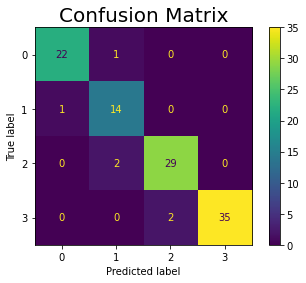

In [25]:
plot_confusion_matrix(model, X_test, y_test)
plt.title('Confusion Matrix', fontsize=20);
plt.show()

Print Label counts

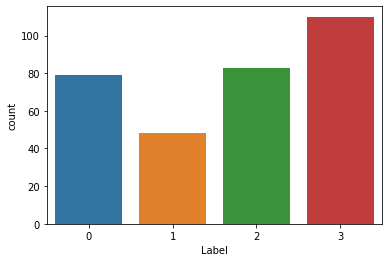

In [26]:
ax = sns.countplot(x=y, data=data)

Print correlation matrix

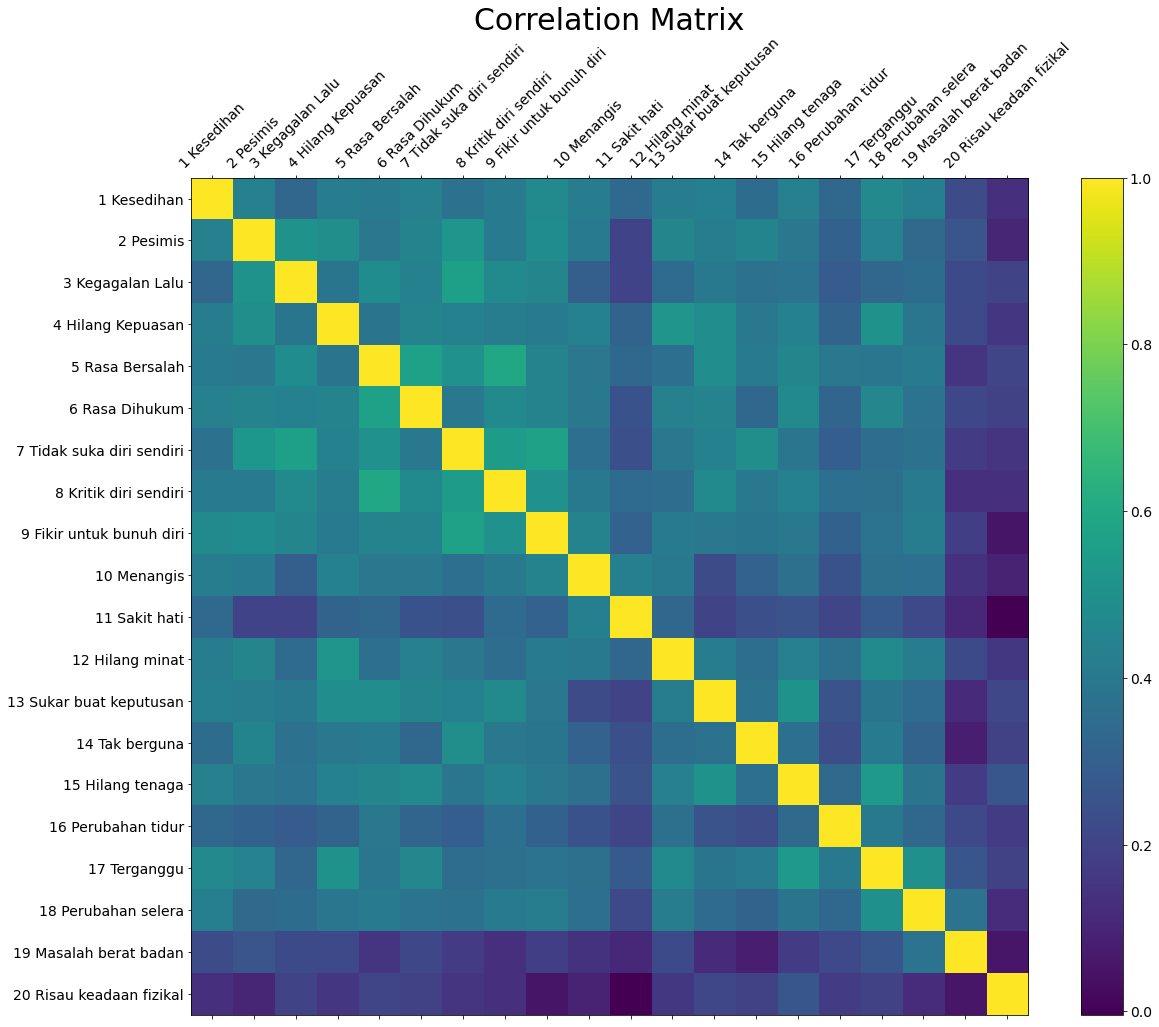

In [27]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=30);

Print out learning curve

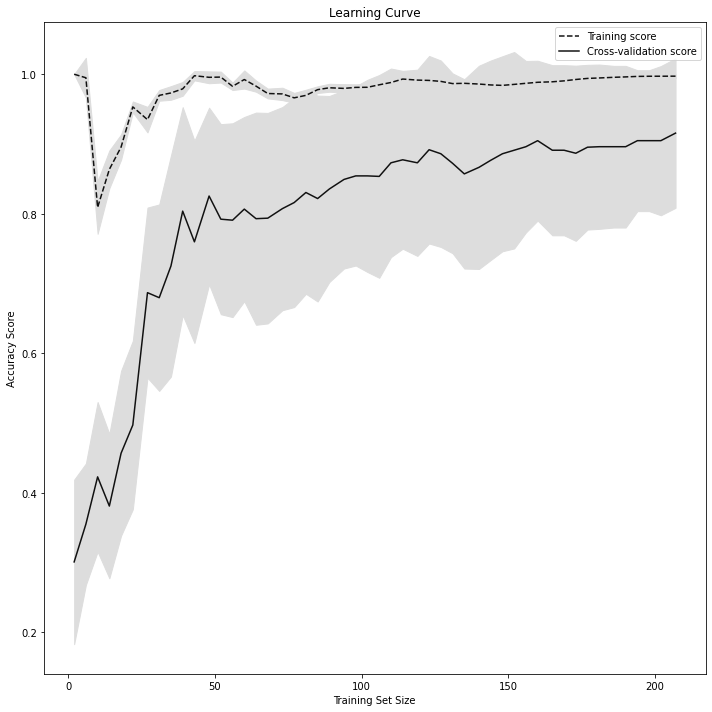

In [28]:
train_sizes, train_scores, test_scores = learning_curve(svm.SVC(decision_function_shape='ovo'), X_train, y_train, cv=33, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()